In [1]:
from sklearn.feature_extraction import DictVectorizer
import csv
from sklearn import tree
from sklearn import preprocessing
from sklearn.externals.six import StringIO
from IPython.display import Image

In [2]:
data = open('E:\Working\DataMining\homework\hw4\data.csv', 'r')
reader = csv.reader(data)
headers = next(reader)

print(headers)

featureList = []
labelList = []

for row in reader:
    labelList.append(row[len(row) - 1])
    rowDict = {}
    for i in range(1, len(row) - 1):
        rowDict[headers[i]] = row[i]
    featureList.append(rowDict)

print(featureList)
print(labelList)

['id', 'figure', 'hair_color', 'age', 'class']
[{'figure': 'short', 'hair_color': 'gold', 'age': 'old'}, {'figure': 'tall', 'hair_color': 'red', 'age': 'old'}, {'figure': 'tall', 'hair_color': 'gold', 'age': 'old'}, {'figure': 'short', 'hair_color': 'gold', 'age': 'adult'}, {'figure': 'tall', 'hair_color': 'black', 'age': 'child'}, {'figure': 'short', 'hair_color': 'black', 'age': 'old'}, {'figure': 'tall', 'hair_color': 'black', 'age': 'old'}, {'figure': 'tall', 'hair_color': 'black', 'age': 'adult'}, {'figure': 'short', 'hair_color': 'gold', 'age': 'child'}]
['1', '1', '1', '1', '2', '2', '2', '2', '2']


In [3]:
v = DictVectorizer()
dummyX = v.fit_transform(featureList).toarray()

print("dummyX: " + str(dummyX))
print(v.get_feature_names())
print("labelList: " + str(labelList))

# vectorize class labels
lb = preprocessing.LabelBinarizer()
dummyY = lb.fit_transform(labelList)
print("dummyY: ", str(dummyY))

dummyX: [[ 0.  0.  1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  1.]
 [ 0.  0.  1.  0.  1.  0.  1.  0.]
 [ 1.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  1.  1.  0.  0.]
 [ 0.  0.  1.  1.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  1.  1.  0.  0.]
 [ 1.  0.  0.  0.  1.  1.  0.  0.]
 [ 0.  1.  0.  1.  0.  0.  1.  0.]]
['age=adult', 'age=child', 'age=old', 'figure=short', 'figure=tall', 'hair_color=black', 'hair_color=gold', 'hair_color=red']
labelList: ['1', '1', '1', '1', '2', '2', '2', '2', '2']
dummyY:  [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [4]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(dummyX, dummyY)
print("clf: ", str(clf))

clf:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


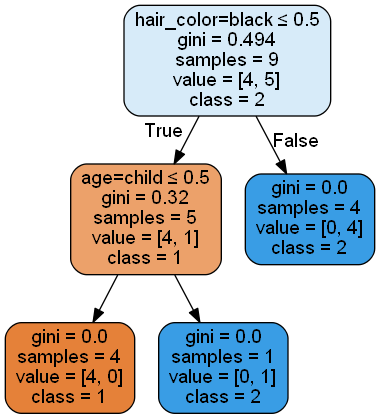

In [6]:
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=v.get_feature_names(),  
                         class_names=['1', '2'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [7]:
import numpy as np  
from sklearn.naive_bayes import MultinomialNB  

clf = MultinomialNB(alpha=2.0,fit_prior=True)  
clf.fit(dummyX, dummyY) 

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=2.0, class_prior=None, fit_prior=True)

In [10]:
clf.class_log_prior_  

array([-0.81093022, -0.58778666])

In [11]:
clf.feature_log_prob_ 

array([[-2.23359222, -2.63905733, -1.7227666 , -1.94591015, -1.94591015,
        -2.63905733, -1.7227666 , -2.23359222],
       [-2.33537492, -2.04769284, -2.04769284, -2.04769284, -1.82454929,
        -1.64222774, -2.33537492, -2.74084002]])

In [12]:
clf.class_count_  

array([ 4.,  5.])

In [13]:
clf.feature_count_  

array([[ 1.,  0.,  3.,  2.,  2.,  0.,  3.,  1.],
       [ 1.,  2.,  2.,  2.,  3.,  4.,  1.,  0.]])

In [15]:
clf.predict([[ 1., 0., 0., 1., 0., 1., 0., 0.]])  

array([1])

In [29]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
X = np.array([[0, 4], [6, 5]])
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:
points = np.array([[1, 3], [1, 2], [2, 1], [2, 2], [2, 3], [3, 2], [5, 3], [4, 3], [4, 5], [5, 4], [5, 5], [6, 4], [6, 5]])
for i in range(points.shape[0]):
    X = np.append(X , np.expand_dims(points[i],axis=0), axis=0)
    clf.fit_predict(X)
    print(clf.cluster_centers_)
    print(clf.labels_)
    print()

[[ 6.   5. ]
 [ 0.5  3.5]]
[1 0 1]

[[ 0.66666667  3.        ]
 [ 6.          5.        ]]
[0 1 0 0]

[[ 1.   2.5]
 [ 6.   5. ]]
[0 1 0 0 0]

[[ 1.2  2.4]
 [ 6.   5. ]]
[0 1 0 0 0 0]

[[ 1.33333333  2.5       ]
 [ 6.          5.        ]]
[0 1 0 0 0 0 0]

[[ 1.57142857  2.42857143]
 [ 6.          5.        ]]
[0 1 0 0 0 0 0 0]

[[ 1.57142857  2.42857143]
 [ 5.5         4.        ]]
[0 1 0 0 0 0 0 0 1]

[[ 1.57142857  2.42857143]
 [ 5.          3.66666667]]
[0 1 0 0 0 0 0 0 1 1]

[[ 1.57142857  2.42857143]
 [ 4.75        4.        ]]
[0 1 0 0 0 0 0 0 1 1 1]

[[ 1.57142857  2.42857143]
 [ 4.8         4.        ]]
[0 1 0 0 0 0 0 0 1 1 1 1]

[[ 1.57142857  2.42857143]
 [ 4.83333333  4.16666667]]
[0 1 0 0 0 0 0 0 1 1 1 1 1]

[[ 5.          4.14285714]
 [ 1.57142857  2.42857143]]
[1 0 1 1 1 1 1 1 0 0 0 0 0 0]

[[ 1.57142857  2.42857143]
 [ 5.125       4.25      ]]
[0 1 0 0 0 0 0 0 1 1 1 1 1 1 1]



In [35]:
import matplotlib.pyplot as plt
g1 = np.array([X[i] for i in range(X.shape[0]) if clf.labels_[i] == 0])
g2 = np.array([X[i] for i in range(X.shape[0]) if clf.labels_[i] == 1])


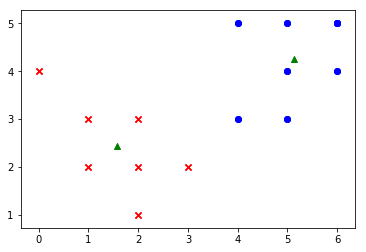

In [40]:
plt.scatter(g1[:, 0], g1[:, 1], marker='x',color='r')
plt.scatter(g2[:, 0], g2[:, 1], marker='o',color='b')
plt.scatter([1.57142857, 5.125], [2.42857143, 4.25], marker='^',color='g')
plt.show()